## Homework 3: Imbalanced Datasets

### Instructions:
Please upload the *.ipynb* AND *.pdf* to Gradescope prior to the deadline (10/31). Submission on Courseworks/Canvas is **not** required, and won't be accepted.

Please name your soltution file in the following format - AML_HW3_Solutions_(YOUR_UNI)


### GIST:
The goal of this assignment is to build a model that can reliably predict the fraudulent transactions from a Credit Card fraud dataset. You will notice that, without much effort, you can build a model that gives you a very high ‘accuracy’ score. However, this metric is misleading since the model cannot correctly classify instances of the minority class (‘1’ in this case). This can be attributed to the  inherent imbalance present in the target column of the dataset.  

To solve this issue, you will need to employ certain ML techniques that are designed to counter class imbalance. Hence, the focus of this assignment will be towards addressing class imbalance and testing the model using different evaluation metrics other than just accuracy.

## Name: Ruoheng Du

## UNI: rd3165

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Import below any other packages you need for your solution

In [18]:
from imblearn.pipeline import make_pipeline as imb_make_pipeline
from sklearn.metrics import classification_report

In [19]:
#libraries
from sklearn.model_selection import train_test_split, cross_val_predict, KFold, cross_validate
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, average_precision_score, confusion_matrix, roc_curve,classification_report, ConfusionMatrixDisplay
import imblearn
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [20]:
df = pd.read_csv('https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv')
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


### **1. Examining Class Imbalance.**

a. Examine the class imbalance in the target column. What is its class distribution? Show this information visually using an appropriate scale.

b. What is the degree of imbalance? (Mild/Moderate/Extreme)

Class
0    284315
1       492
Name: count, dtype: int64


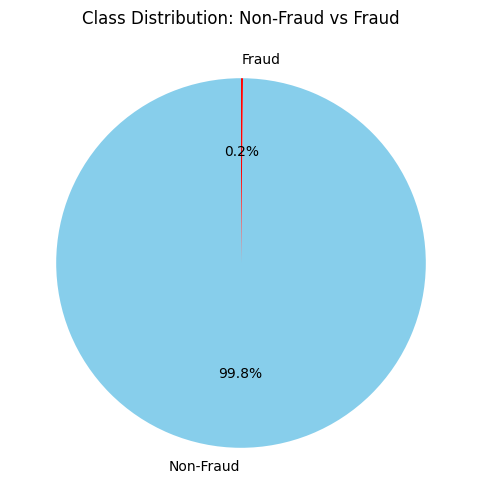

In [21]:
#Your code here
class_distribution = df['Class'].value_counts()
print(class_distribution)
class_percent = class_distribution / class_distribution.sum() * 100
plt.figure(figsize=(6,6))
plt.pie(class_percent, labels=['Non-Fraud', 'Fraud'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'red'])
plt.title('Class Distribution: Non-Fraud vs Fraud')
plt.show()

In [22]:
#Your code here
total = class_distribution.sum()
fraud_percentage = (class_distribution[1] / total) * 100
non_fraud_percentage = (class_distribution[0] / total) * 100

print(f"Fraud cases: {fraud_percentage:.2f}%")
print(f"Non-fraud cases: {non_fraud_percentage:.2f}%")

Fraud cases: 0.17%
Non-fraud cases: 99.83%


The degree of class imbalance is extreme.

### **2. Pre-processing**

The raw data has a few issues. <br>
Since we are unsure what the time column actually means so drop the Time column.
The Amount column also has a wide range of values covered so we take the log of the Amount column to reduce its range. <br>

The below is already done for you.

In [23]:
# You don't want the 'Time' column. Pop it off
df.pop('Time')

# The 'Amount' column covers a huge range. Convert it to log-space.
eps = 0.001
df['Log Amount'] = np.log(df.pop('Amount') + eps)

a. Split the dataset into development and test sets. What splitting methodology did you choose, and why? </br>
b. Scale numerical columns. </br>
c. Print the shape of the development and test set.

In [24]:
#Your code here
X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42, stratify=y)

I chose stratified splitting because it ensures that the class distribution (fraud and non-fraud instances) in both the training and test sets reflects the original distribution in the dataset. This is especially important for imbalanced datasets, which maintains the proportion of the minority class (fraud) across both sets and ensures that the model is trained and evaluated with a representative sample of each class.

In [25]:
#Your code here
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
#Your code here
print("Shape of scaled X_train:", X_train_scaled.shape)
print("Shape of scaled X_test:", X_test_scaled.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of scaled X_train: (227845, 29)
Shape of scaled X_test: (56962, 29)
Shape of y_train: (227845,)
Shape of y_test: (56962,)


### 3.1 Default Dataset
Use the Decision tree classifier (use max_depth=10 and random_state=42) model and print the AUC and Average Precision values of 5 Fold Cross Validation </br>

In [27]:
#Your Code Here
dt = DecisionTreeClassifier(max_depth=10, random_state=42)
scoring_metrics = ['roc_auc', 'average_precision']

cv_results = cross_validate(dt, X_train_scaled, y_train,
                            cv=5, scoring=scoring_metrics, return_train_score=False)

print(f"Default AUC: {np.mean(cv_results['test_roc_auc']):.4f}")
print(f"Default Average Precision: {np.mean(cv_results['test_average_precision']):.4f}")

Default AUC: 0.8360
Default Average Precision: 0.6417


### 3.2 Balanced Weight

a. Here, we are going to use a 'balanced' decision tree clasifier on the same dataset. Use max_depth=10 and random_state=42, and then print the AUC and Average Precision values of 5 Fold Cross Validation.

In [28]:
#Your Code Here
dt_balanced = DecisionTreeClassifier(max_depth=10, random_state=42, class_weight='balanced')
scoring_metrics = ['roc_auc', 'average_precision']

cv_results_balanced = cross_validate(dt_balanced, X_train_scaled, y_train,
                                     cv=5, scoring=scoring_metrics, return_train_score=False)

print(f"Balanced AUC: {np.mean(cv_results_balanced['test_roc_auc']):.4f}")
print(f"Balanced Average Precision: {np.mean(cv_results_balanced['test_average_precision']):.4f}")

Balanced AUC: 0.9055
Balanced Average Precision: 0.5236


### 3.3 Random Oversampling

a. Perform random oversampling on the development dataset. (Please set random state to 42 while doing this).
Examine the target column again. What is its class distribution now? Print the shape of the development set. </br>

b. Repeat part 3.1 again. Use the Decision tree classifier (use max_depth=10 and random_state=42) model and print the AUC and Average Precision values of 5 Fold Cross Validation

In [29]:
#Your Code Here
ros = RandomOverSampler(random_state=42)

X_train_ros, y_train_ros = ros.fit_resample(X_train_scaled, y_train)

class_distribution_ros = pd.Series(y_train_ros).value_counts()

print(class_distribution_ros)

print("Shape of X_train after oversampling:", X_train_ros.shape)
print("Shape of y_train after oversampling:", y_train_ros.shape)

Class
0    227451
1    227451
Name: count, dtype: int64
Shape of X_train after oversampling: (454902, 29)
Shape of y_train after oversampling: (454902,)


In [30]:
#Your Code Here
dt_ros = imb_make_pipeline(RandomOverSampler(random_state=42),
                           DecisionTreeClassifier(max_depth=10, random_state=42))
scoring_metrics = ['roc_auc', 'average_precision']

cv_results_ros = cross_validate(dt_ros, X_train_scaled, y_train, cv=5,
                                scoring=scoring_metrics, return_train_score=False)

print(f"Random Oversampling AUC: {np.mean(cv_results_ros['test_roc_auc']):.4f}")
print(f"Random Oversampling Average Precision: {np.mean(cv_results_ros['test_average_precision']):.4f}")

Random Oversampling AUC: 0.8963
Random Oversampling Average Precision: 0.5168


### 3.4 Random Undersampling

a. Perform random undersampling on the development dataset. (Please set random state to 42 while doing this).
Examine the target column again. What is its class distribution now? Print the shape of the development set. </br>

b. Repeat part 3.1 again. Use the Decision tree classifier (use max_depth=10 and random_state=42) model and print the AUC and Average Precision values of 5 Fold Cross Validation

In [31]:
#Your Code Here
rus = RandomUnderSampler(replacement=False, random_state=42)

X_train_rus, y_train_rus = rus.fit_resample(X_train_scaled, y_train)

class_distribution_rus = pd.Series(y_train_rus).value_counts()

print(class_distribution_rus)

print("Shape of X_train after undersampling:", X_train_rus.shape)
print("Shape of y_train after undersampling:", y_train_rus.shape)

Class
0    394
1    394
Name: count, dtype: int64
Shape of X_train after undersampling: (788, 29)
Shape of y_train after undersampling: (788,)


In [32]:
#Your Code Here
dt_rus = imb_make_pipeline(RandomUnderSampler(replacement=False, random_state=42),
                           DecisionTreeClassifier(max_depth=10, random_state=42))
scoring_metrics = ['roc_auc', 'average_precision']

cv_results_rus = cross_validate(dt_rus, X_train_scaled, y_train,
                                cv=5, scoring=scoring_metrics, return_train_score=False)

print(f"Random Undersampling AUC: {np.mean(cv_results_rus['test_roc_auc']):.4f}")
print(f"Random Undersampling Average Precision: {np.mean(cv_results_rus['test_average_precision']):.4f}")

Random Undersampling AUC: 0.9073
Random Undersampling Average Precision: 0.0166


### 3.5 SMOTE

a. Perform Synthetic Minority Oversampling Technique (SMOTE) on the development dataset. (Please set random state to 42 while doing this). Examine the target column again. What is its class distribution now? Print the shape of the development set. </br>

b. Repeat part 3.1 again. Use the Decision tree classifier (use max_depth=10 and random_state=42) model and print the AUC and Average Precision values of 5 Fold Cross Validation

In [33]:
#Your Code Here
smote = SMOTE(random_state=42)

X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

class_distribution_smote = pd.Series(y_train_smote).value_counts()

print(class_distribution_smote)

print("Shape of X_train after SMOTE:", X_train_smote.shape)
print("Shape of y_train after SMOTE:", y_train_smote.shape)

Class
0    227451
1    227451
Name: count, dtype: int64
Shape of X_train after SMOTE: (454902, 29)
Shape of y_train after SMOTE: (454902,)


In [34]:
#Your Code Here
dt_smote = imb_make_pipeline(SMOTE(random_state=42),
                             DecisionTreeClassifier(max_depth=10, random_state=42))
scoring_metrics = ['roc_auc', 'average_precision']

cv_results_smote = cross_validate(dt_smote, X_train_scaled, y_train,
                                  cv=5, scoring=scoring_metrics, return_train_score=False)

print(f"SMOTE AUC: {np.mean(cv_results_smote['test_roc_auc']):.4f}")
print(f"SMOTE Average Precision: {np.mean(cv_results_smote['test_average_precision']):.4f}")

SMOTE AUC: 0.9023
SMOTE Average Precision: 0.4706


### 3.6 Visual Comparison

Prepare a plot comparing the class distribution of the target column for each of the imbalance techniques used above. Use the default class split as well.

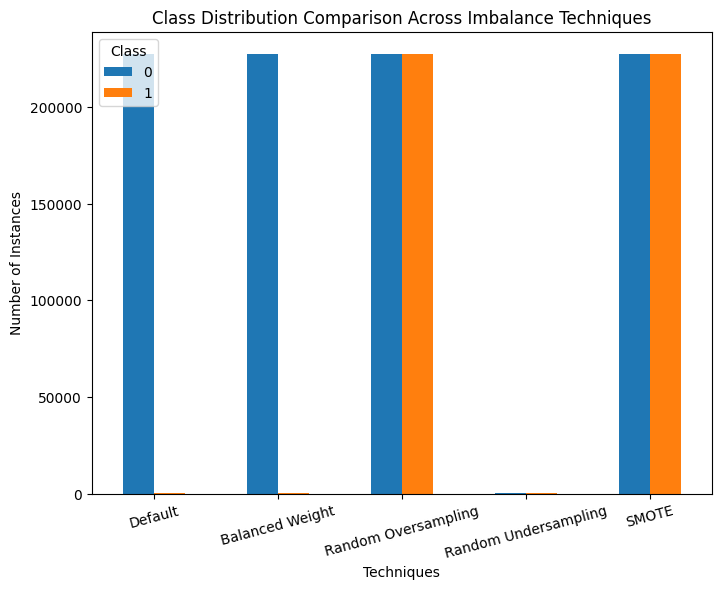

In [35]:
#Your Code Here
class_distribution_default = y_train.value_counts()

class_distributions_df = pd.DataFrame({
    'Default': class_distribution_default,
    'Balanced Weight': class_distribution_default,
    'Random Oversampling': class_distribution_ros,
    'Random Undersampling': class_distribution_rus,
    'SMOTE': class_distribution_smote
}).T

class_distributions_df.plot(kind='bar', figsize=(8, 6), stacked=False)
plt.title('Class Distribution Comparison Across Imbalance Techniques')
plt.ylabel('Number of Instances')
plt.xlabel('Techniques')
plt.xticks(rotation=15)
plt.legend(title='Class')
plt.show()

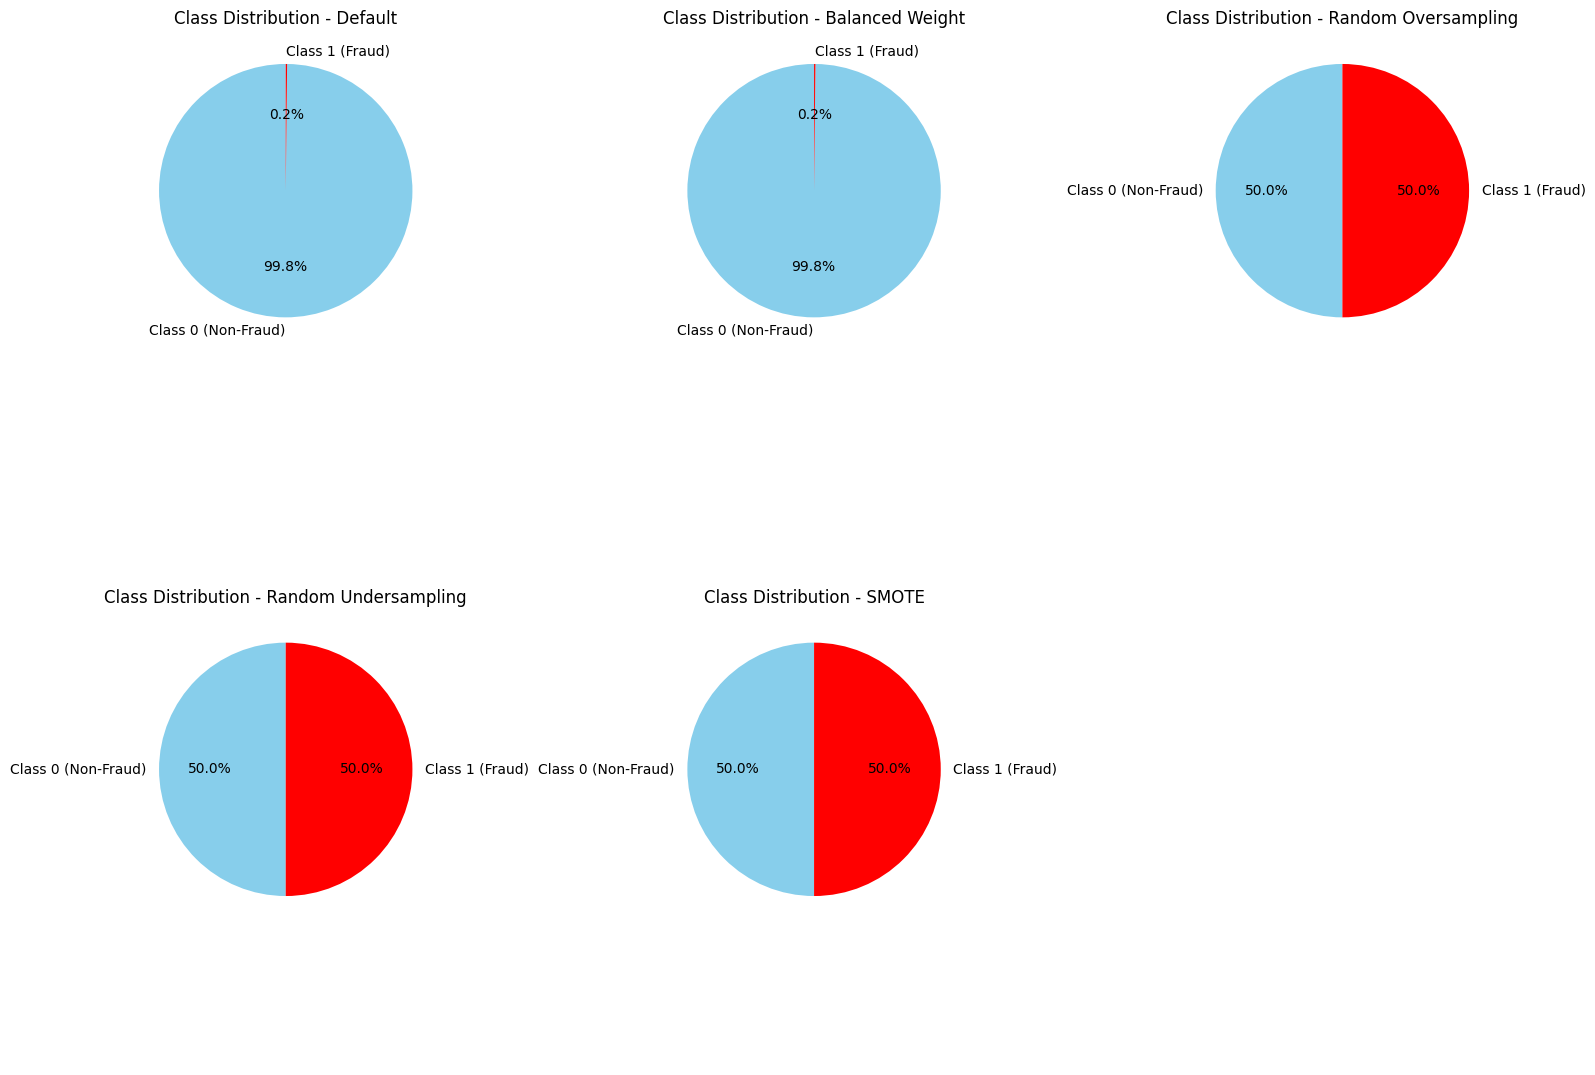

In [41]:
#Your Code Here
fig, axs = plt.subplots(2, 3, figsize=(16, 12))
labels = ['Class 0 (Non-Fraud)', 'Class 1 (Fraud)']

axs[0, 0].pie(class_distribution_default, labels=labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'red'])
axs[0, 0].set_title('Class Distribution - Default')

axs[0, 1].pie(class_distribution_default, labels=labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'red'])
axs[0, 1].set_title('Class Distribution - Balanced Weight')

axs[0, 2].pie(class_distribution_ros, labels=labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'red'])
axs[0, 2].set_title('Class Distribution - Random Oversampling')

axs[1, 0].pie(class_distribution_rus, labels=labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'red'])
axs[1, 0].set_title('Class Distribution - Random Undersampling')

axs[1, 1].pie(class_distribution_smote, labels=labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'red'])
axs[1, 1].set_title('Class Distribution - SMOTE')

axs[1, 2].axis('off')

plt.tight_layout()
plt.show()

### **4.1: Model Prediction & Evaluation - AUC Scores**
Make predictions on the test set using the five models that you built and report their AUC values<br>
(Five models include models from - Default Baseline, Random Undersampling, Random Oversampling, SMOTE & Balanced Weight). Did the models with high AUC scores on the development set exhibit similar performance on the test set? Explain.

In [42]:
#Your Code Here
def auc(model, X_test, y_test):
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_pred_proba)
    return auc

dt.fit(X_train_scaled, y_train)
dt_balanced.fit(X_train_scaled, y_train)
dt_ros.fit(X_train_ros, y_train_ros)
dt_rus.fit(X_train_rus, y_train_rus)
dt_smote.fit(X_train_smote, y_train_smote)

auc_default = auc(dt, X_test_scaled, y_test)
auc_balanced = auc(dt_balanced, X_test_scaled, y_test)
auc_ros = auc(dt_ros, X_test_scaled, y_test)
auc_rus = auc(dt_rus, X_test_scaled, y_test)
auc_smote = auc(dt_smote, X_test_scaled, y_test)

print(f"Default Baseline AUC: {auc_default:.6f}")
print(f"Balanced Weight AUC: {auc_balanced:.6f}")
print(f"Random Oversampling AUC: {auc_ros:.6f}")
print(f"Random Undersampling AUC: {auc_rus:.6f}")
print(f"SMOTE AUC: {auc_smote:.6f}")

Default Baseline AUC: 0.819632
Balanced Weight AUC: 0.901740
Random Oversampling AUC: 0.901673
Random Undersampling AUC: 0.895998
SMOTE AUC: 0.875268


The models with high AUC scores on the development set generally exhibited similar performance on the test set.

1. Default Model:
- Development AUC: 0.8360
- Test AUC: 0.8196

The default model shows a very close AUC score between the development set and the test set, suggesting that the model generalizes well and is not overfitting to the training data.

2. Balanced Weight Model:
- Development AUC: 0.9055
- Test AUC: 0.9017

The Balanced Weight model displays almost identical AUC scores between the development set and the test set. This indicates that assigning weights to the minority class helped balance the data without significantly altering its overall distribution. The model performs stably across both datasets.

3. Random Oversampling Model:
- Development AUC: 0.8963
- Test AUC: 0.9017

The AUC for the Random Oversampling model shows a slight increase in the test set compared to the development set, but the difference is minimal. This suggests that oversampling the minority class helped improve the model's ability to generalize well across unseen data.

4. Random Undersampling Model:
- Development AUC: 0.9073
- Test AUC: 0.8960

Although the AUC for Random Undersampling slightly drops in the test set, the overall difference is small. The slight decrease in AUC could be due to a reduced ability to distinguish between classes when facing unseen majority class samples.

5. SMOTE Model:
- Development AUC: 0.9023
- Test AUC: 0.8753

For the SMOTE model, there is a relatively noticeable drop in AUC from the development set to the test set. This could be attributed to the synthetic generation of minority class samples during training. When faced with test data that lacks synthetic samples, the model's ability to generalize is slightly reduced, resulting in a lower AUC on the test set.

Overall:

The models with high AUC scores on the development set exhibited similar performance on the test set, particularly for the Balanced Weight model.

### **4.2: Model Prediction & Evaluation - Confusion Matrix**
a. Plot Confusion Matrices for all the five models on the test set. Comment on your results and share in detail. Consider precision, recall and f1 scores. <br>
b. For the dataset at hand, which evaluation metric matters most according to you? Would it make sense to prioritise either precision/recall over the other? Justify.

In [43]:
#Your Code Here
def plot_matrix(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)

    matrix = confusion_matrix(y_test, y_pred)

    disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=[0, 1])
    disp.plot(cmap='Blues')
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

    print(f"Classification Report - {model_name}")
    print(classification_report(y_test, y_pred, target_names=['Non-Fraud (0)', 'Fraud (1)']))

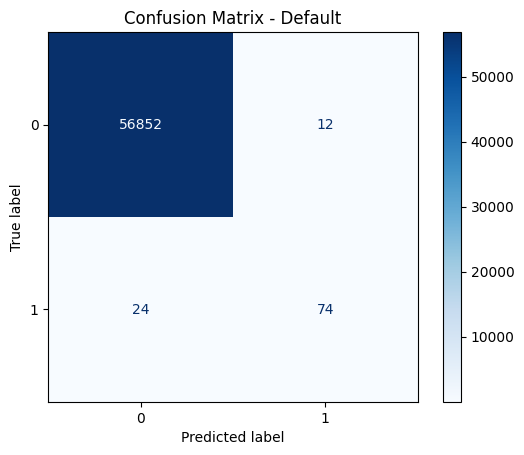

Classification Report - Default
               precision    recall  f1-score   support

Non-Fraud (0)       1.00      1.00      1.00     56864
    Fraud (1)       0.86      0.76      0.80        98

     accuracy                           1.00     56962
    macro avg       0.93      0.88      0.90     56962
 weighted avg       1.00      1.00      1.00     56962



In [44]:
#Your Code Here
plot_matrix(dt, X_test_scaled, y_test, "Default")

The Default Model performs well for the majority class (Non-Fraud) with perfect precision, recall, and F1-score. However, for the Fraud class (minority), the recall is a bit low (0.76), meaning the model misses some Fraud cases. The precision for Fraud is also not perfect, with 14% of the predicted Fraud cases being incorrect. This performance is typical for a model trained on imbalanced data, as it tends to be biased toward the majority class (Non-Fraud). In cases where detecting Fraud is critical, improving the recall for the Fraud class might be more important than achieving perfect precision.

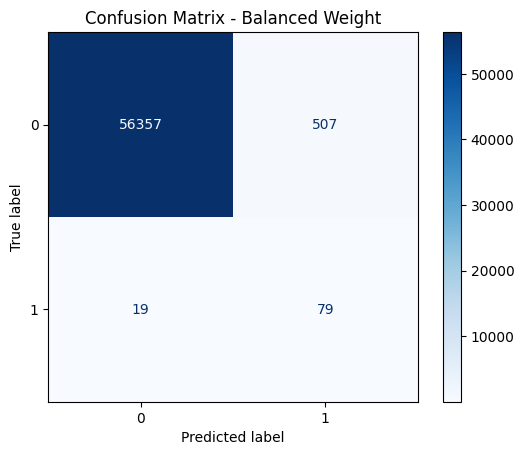

Classification Report - Balanced Weight
               precision    recall  f1-score   support

Non-Fraud (0)       1.00      0.99      1.00     56864
    Fraud (1)       0.13      0.81      0.23        98

     accuracy                           0.99     56962
    macro avg       0.57      0.90      0.61     56962
 weighted avg       1.00      0.99      0.99     56962



In [45]:
#Your Code Here
plot_matrix(dt_balanced, X_test_scaled, y_test, "Balanced Weight")

The Balanced Weight Model has made significant improvements in recall for the Fraud class (0.81), meaning it detects more Fraud cases than the default model. However, this improvement comes at the cost of precision. The model predicts far too many false positives, which is reflected in the very low precision score (0.13). This indicates that although the model catches more Fraud cases, it struggles to accurately differentiate between Fraud and Non-Fraud when predicting Fraud, resulting in a large number of false alarms.

However, in this context, this model might be suitable because of its higher recall, but it may not be ideal in situations where false positives are costly.

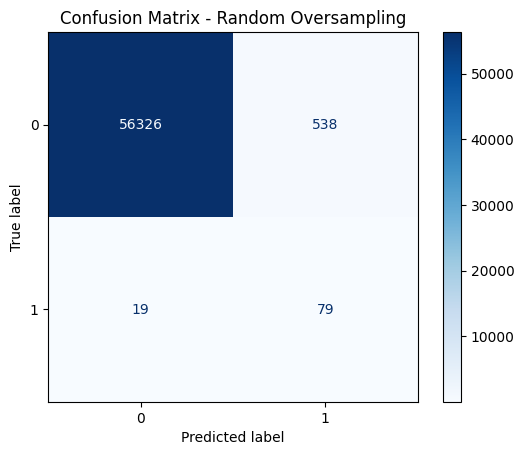

Classification Report - Random Oversampling
               precision    recall  f1-score   support

Non-Fraud (0)       1.00      0.99      1.00     56864
    Fraud (1)       0.13      0.81      0.22        98

     accuracy                           0.99     56962
    macro avg       0.56      0.90      0.61     56962
 weighted avg       1.00      0.99      0.99     56962



In [46]:
#Your Code Here
plot_matrix(dt_ros, X_test_scaled, y_test, "Random Oversampling")

The Random Oversampling Model shows very similar performance to the Balanced Weight Model in terms of precision, recall, and F1-score for the Fraud class. It successfully detects most Fraud cases but at the expense of generating many false positives.

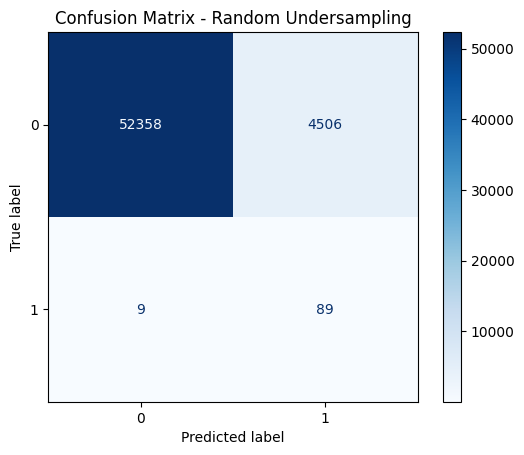

Classification Report - Random Undersampling
               precision    recall  f1-score   support

Non-Fraud (0)       1.00      0.92      0.96     56864
    Fraud (1)       0.02      0.91      0.04        98

     accuracy                           0.92     56962
    macro avg       0.51      0.91      0.50     56962
 weighted avg       1.00      0.92      0.96     56962



In [47]:
#Your Code Here
plot_matrix(dt_rus, X_test_scaled, y_test, "Random Undersampling")

For Random Undersampling Model, the recall for the Fraud class (0.91) is the highest among all models, meaning the model correctly identifies 91% of actual Fraud cases. However, at the cost of generating an overwhelming number of false positives with the extremely low precision for the Fraud class (0.02). This model works well when missing a Fraud case is far more costly than wrongly classifying Non-Fraud as Fraud. However, if the cost of manual reviewing false alarms is high, this model may not work well.

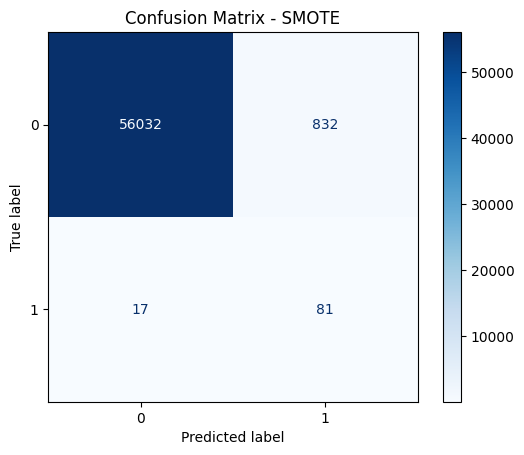

Classification Report - SMOTE
               precision    recall  f1-score   support

Non-Fraud (0)       1.00      0.99      0.99     56864
    Fraud (1)       0.09      0.83      0.16        98

     accuracy                           0.99     56962
    macro avg       0.54      0.91      0.58     56962
 weighted avg       1.00      0.99      0.99     56962



In [48]:
#Your Code Here
plot_matrix(dt_smote, X_test_scaled, y_test, "SMOTE")

For the SMOTE Model, the recall for the Fraud class (0.83) is relatively high, meaning the model correctly identifies 83% of actual Fraud cases. This is comparable to the recall seen in the previous models (Balanced Weight and Random Oversampling), and it's lower than the Random Undersampling model's 91% recall. The precision for the Fraud class (0.09) is still very low, meaning that more Fraud cases are identified, but at the expense of falsely labeling many Non-Fraud cases as Fraud. As a result, similarly, this model would be suitable in scenarios where the primary concern is not missing Fraud cases.

In [ ]:
#Comment

Among models with accuracy score of 0.99, the SMOTE model achieves the highest Class 1 recall of 0.83. Similarly, the Balanced Weight and Random Oversampling models both reach the recall of 0.81 for fraud detection. However, these gains in recall come at the cost of precision, with precision values as low as 0.09 for SMOTE and 0.13 for the other two models. For Random Undersampling, with accuray score of 0.92, among all models, it has the lowest precision of 0.02 and the highest recall of 0.91 for fraud detection.

Despite the reduction in precision, prioritizing recall is essential in this context, especially when considering the potential high financial and security risks associated with missed fraudulent transactions (false negatives). Missing even a single fraud case could lead to substantial financial losses or compromised customer security, while recall measures model's ability to correctly identify fraudulent transactions and minimize false negatives. On the other hand, false positives (legitimate transactions mistakenly flagged as fraud) can be managed through manual review or additional verification steps, which cause less harm than allowing fraudulent transactions to go undetected.

### **4.3: Model Prediction & Evaluation - ROC Curves**

Plot ROC for all the five models on the test set in a single plot. Recomment which technique is most appropriate and why.

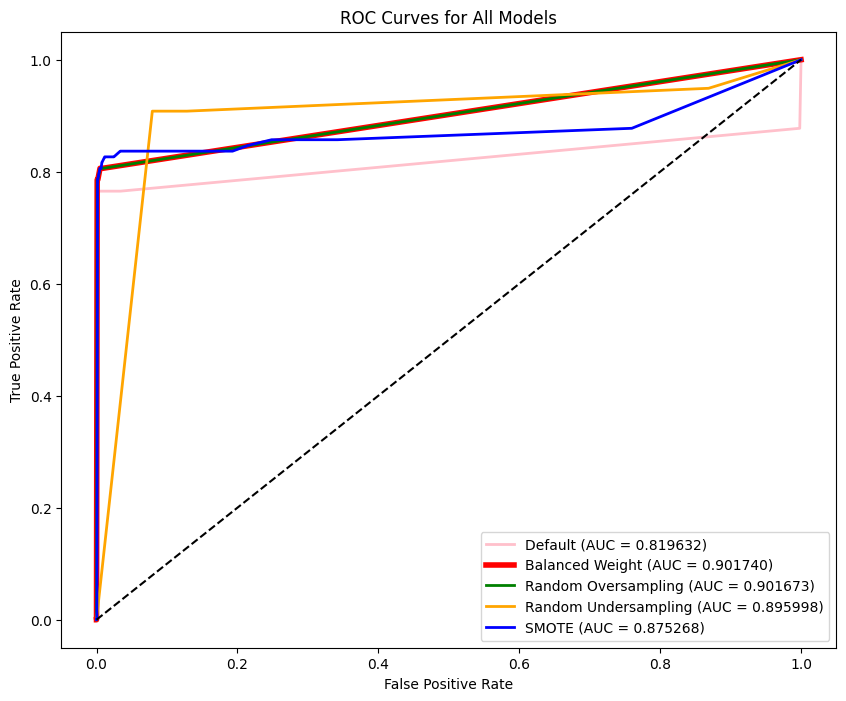

In [49]:
#Your Code Here
def plot_curve(model, X_test, y_test, model_name, color, linewidth=2):
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba, pos_label=1)
    auc = roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.6f})', color=color, linewidth=linewidth)

plt.figure(figsize=(10, 8))

plot_curve(dt, X_test_scaled, y_test, "Default", color='pink')
plot_curve(dt_balanced, X_test_scaled, y_test, "Balanced Weight", color='red', linewidth=4)
plot_curve(dt_ros, X_test_scaled, y_test, "Random Oversampling", color='green')
plot_curve(dt_rus, X_test_scaled, y_test, "Random Undersampling", color='orange')
plot_curve(dt_smote, X_test_scaled, y_test, "SMOTE", color='blue')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for All Models')
plt.legend(loc="lower right")
plt.show()

In [ ]:
#Comment

1. Random Undersampling:
   - AUC = 0.895998: It indicates good overall performance in distinguishing between fraud and non-fraud transactions.
   - Recall for Fraud (Class 1) = 0.91: It is the highest recall among all models, making it the strongest model in terms of minimizing missed fraud cases (false negatives).
   - Problem: It has the lowest precision (higher false positive rates) among all the models. It reduces the majority class to balance the data, which may result in a loss of important information.

2. Balanced Weight:
   - AUC = 0.901740: It is the highest AUC among all model, meaning it performs well in distinguishing between the two classes
   - Recall for Fraud (Class 1) = 0.81: It is lower than Random Undersampling.

3. Random Oversampling:
   - AUC = 0.901673: It indicates that this model performs pretty good in distinguishing between the two classes
   - Recall for Fraud (Class 1) = 0.81: It is lower than Random Undersampling.

4. SMOTE:
   - AUC = 0.875258: It is slightly lower than other techniques but still reasonable.
   - Recall for Fraud (Class 1) = 0.83: It is better than Balanced Weight and Random Oversampling but still not as high as Random Undersampling.

5. Default Model:
   - AUC = 0.819632: It is the lowest among all models.
   - Recall for Fraud (Class 1) = 0.76: It means that it misses a considerable number of fraud cases.

Based on the above, Random Undersampling is the most appropriate technique since for most credit card fraud detection scenarios, recall would be prioritized to ensure that the model catches as many fraudulent transactions as possible. However, if the cost of handling false positives is significant for the bank, Balanced Weight could be a good choice since they offer similar AUC and slightly lower recall.